# what factor to sale cars?
as an analyst at Crankshaft List. Hundreds of free vehicle ads are displayed on company websites every day. you are assigned to study data that has been collected over the last few years to determine the factors that influence the price of a vehicle.

## Pra-Processing

In [1]:
# Muat semua library
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datasets/vehicles_us.csv')

### Loading Data

In [2]:
# load data into DataFrame
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.isna().sum().sort_values(ascending=True)/len(df)

price           0.000000
model           0.000000
condition       0.000000
fuel            0.000000
transmission    0.000000
type            0.000000
date_posted     0.000000
days_listed     0.000000
model_year      0.070238
cylinders       0.102086
odometer        0.153168
paint_color     0.179854
is_4wd          0.503697
dtype: float64

In [5]:
df[['model_year','cylinders','odometer','paint_color','is_4wd']]

,model_year,cylinders,odometer,paint_color,is_4wd
0,2011.0,6.0,145000.0,NaN,1.0
1,NaN,6.0,88705.0,white,1.0
2,2013.0,4.0,110000.0,red,NaN
3,2003.0,8.0,NaN,NaN,NaN
4,2017.0,4.0,80903.0,black,NaN
...,...,...,...,...,...
51520,2013.0,6.0,88136.0,black,NaN
51521,2002.0,4.0,181500.0,white,NaN
51522,2009.0,4.0,128000.0,blue,NaN
51523,2013.0,4.0,139573.0,black,NaN


### Exploring FistData

The Dataset have Columns :

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, etc.
- `odometer` — vehicle mileage when the ad is shown  
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4 wheel drive (Boolean type)
- `date_posted` — the date the ad was broadcast
- `days_listed` — number of days the ad is displayed until it is removed


In [6]:
# show general information/summary about the DataFrame

df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [8]:
df.isna().sum().sort_values(ascending=True)/len(df)*100

price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
model_year       7.023775
cylinders       10.208637
odometer        15.316836
paint_color     17.985444
is_4wd          50.369723
dtype: float64

In [9]:
df['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [10]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [11]:
df['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [12]:
df['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

In [13]:
df['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [14]:
df['date_posted'].value_counts()

2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2019-01-11    117
2018-06-08    117
2019-01-04    116
Name: date_posted, Length: 354, dtype: int64

In [15]:
df['days_listed'].value_counts()

18     959
24     950
22     945
19     941
20     934
      ... 
199      1
261      1
217      1
228      1
223      1
Name: days_listed, Length: 227, dtype: int64

In [16]:
df['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64

In [17]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [18]:
df['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
280499.0      1
49814.0       1
194920.0      1
140800.0      1
269527.0      1
Name: odometer, Length: 17762, dtype: int64

In [19]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [20]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [21]:
# tampilkan sampel data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


*******  THERE ARE NAN Values (missing values) in the column

model_year       7.023775

cylinders       10.208637

odometer        15.316836

paint_color     17.985444

is_4wd          50.369723

Nilai is_4wd only 1 value



[Are there any columns with inappropriate data types?]

****  Yes

 is_4wd value only 1 



[Are there missing values ​​in all columns or just some? Which column contains the most missing values? Briefly explain what you observed in 1-2 sentences.]

model_year 7.023775

cylinders 10.208637

odometer 15.316836

paint_color 17.985444

is_4wd 50.369723

### Conclusion and Next Steps

[Formulate your conclusions about the initial data. What do you think looks normal and what doesn't?]
[Explain your next steps and how they relate to the conclusions you have drawn so far. In particular, you should clearly state which parts of the data should be handled to make it more suitable for the required analysis.]

##.......Some data needs to be tidied up first 

## Addressing Missing Values ​​(If Any)

[Check the missing values ​​for each column in more detail and determine what to do with them based on the hypothesis.]

In [22]:
df.isnull().sum().sort_values(ascending=True) / len(df) * 100

price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
model_year       7.023775
cylinders       10.208637
odometer        15.316836
paint_color     17.985444
is_4wd          50.369723
dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [24]:
# Handling missing di is_4wd
df['is_4wd'] = df['is_4wd'].fillna(0)

In [25]:
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [26]:
# Fill missing di model year dengan nilai 50%(2011)
#df['model_year'] = df['model_year'].fillna(2011)

In [141]:
def fill_missing_value (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        print(group)
        value = grouped_values[value_column][i]
        print(value)
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [142]:
df=fill_missing_value(df,'model','model_year')

acura tl
2007
bmw x5
2010
buick enclave
2012
cadillac escalade
2009
chevrolet camaro
2013
chevrolet camaro lt coupe 2d
2017
chevrolet colorado
2015
chevrolet corvette
2000
chevrolet cruze
2014
chevrolet equinox
2013
chevrolet impala
2010
chevrolet malibu
2012
chevrolet silverado
2008
chevrolet silverado 1500
2011
chevrolet silverado 1500 crew
2016
chevrolet silverado 2500hd
2010
chevrolet silverado 3500hd
2013
chevrolet suburban
2008
chevrolet tahoe
2009
chevrolet trailblazer
2005
chevrolet traverse
2012
chrysler 200
2014
chrysler 300
2012
chrysler town & country
2010
dodge charger
2013
dodge dakota
2004
dodge grand caravan
2012
ford econoline
2011
ford edge
2013
ford escape
2012
ford expedition
2007
ford explorer
2011
ford f-150
2011
ford f-250
2005
ford f-250 sd
2013
ford f-250 super duty
2008
ford f-350 sd
2011
ford f150
2010
ford f150 supercrew cab xlt
2015
ford f250
2008
ford f250 super duty
2008
ford f350
2008
ford f350 super duty
2006
ford focus
2012
ford focus se
2013
ford fusi

In [29]:
df['model_year'].describe()

count    51525.000000
mean      2009.793954
std          6.099296
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [30]:
df.isnull().sum().sort_values(ascending=True) / len(df) * 100

price            0.000000
model_year       0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
cylinders       10.208637
odometer        15.316836
paint_color     17.985444
dtype: float64

In [31]:
df.isnull().sum().sort_values(ascending=True) / len(df) * 100

price            0.000000
model_year       0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
cylinders       10.208637
odometer        15.316836
paint_color     17.985444
dtype: float64

In [32]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [33]:
# Fill missing di odometer dengan 
#df['odometer'] = df['odometer'].fillna(113000.000000)
df=fill_missing_value(df,'model','odometer')

In [34]:
df.isnull().sum().sort_values(ascending=True) / len(df) * 100

price            0.000000
model_year       0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
odometer         0.079573
cylinders       10.208637
paint_color     17.985444
dtype: float64

In [35]:
df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [36]:
# Fill missing di odometer dengan 6 (nilai 50%)
df['cylinders'] = df['cylinders'].fillna(6)

In [37]:
df.isnull().sum().sort_values(ascending=True) / len(df) * 100

price            0.000000
model_year       0.000000
model            0.000000
condition        0.000000
cylinders        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
odometer         0.079573
paint_color     17.985444
dtype: float64

In [38]:
df['paint_color'].value_counts().sort_values(ascending=True)/len(df) *100

purple     0.197962
orange     0.448326
yellow     0.494905
custom     2.237749
brown      2.373605
green      2.709364
red        8.580301
blue       8.685104
grey       9.775837
silver    12.118389
black     14.928675
white     19.464338
Name: paint_color, dtype: float64

In [39]:
# Fill missing di odometer dengan UNKNOWN

df['paint_color'] = df['paint_color'].fillna('unknown')

In [40]:
df['paint_color'].value_counts().sort_values(ascending=True)/len(df) *100

purple      0.197962
orange      0.448326
yellow      0.494905
custom      2.237749
brown       2.373605
green       2.709364
red         8.580301
blue        8.685104
grey        9.775837
silver     12.118389
black      14.928675
unknown    17.985444
white      19.464338
Name: paint_color, dtype: float64

In [41]:
df.isnull().sum().sort_values(ascending=True) / len(df) * 100

price           0.000000
model_year      0.000000
model           0.000000
condition       0.000000
cylinders       0.000000
fuel            0.000000
transmission    0.000000
type            0.000000
paint_color     0.000000
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
odometer        0.079573
dtype: float64

## Fixed the Data Type

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51484 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [43]:
# change the data type in model year to integer
df['model_year'] = df['model_year'].astype(int)

In [44]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51484 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 5.1+ MB


In [46]:
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

## Improving Data Quality

In [47]:
# Add the time and date values ​​for when the ad was displayed
df['weekday_posted'] = df['date_posted'].dt.weekday
df['year_posted'] = df['date_posted'].dt.year
df['month_posted'] = df['date_posted'].dt.month

In [48]:
# Add the age of the vehicle when the ad is shown
df['car_age'] = df['year_posted'] - df['model_year']

In [49]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,2018,6,7
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,2018,10,7
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2019,2,6
3,1500,2003,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,2019,3,16
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,2019,4,2


In [50]:
df.isnull().sum().sort_values(ascending=True) / len(df) * 100

price             0.000000
year_posted       0.000000
weekday_posted    0.000000
days_listed       0.000000
date_posted       0.000000
is_4wd            0.000000
paint_color       0.000000
month_posted      0.000000
type              0.000000
fuel              0.000000
cylinders         0.000000
condition         0.000000
model             0.000000
model_year        0.000000
transmission      0.000000
car_age           0.000000
odometer          0.079573
dtype: float64

In [1]:
# Add the average vehicle mileage per year
df['odo_per_year'] = df['odometer'] / df['car_age']

NameError: name 'df' is not defined

In [52]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,2018,6,7,20714.285714
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,2018,10,7,12672.142857
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2019,2,6,18333.333333
3,1500,2003,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,2019,3,16,7620.500000
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,2019,4,2,40451.500000
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,2018,6,4,14488.500000
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,2018,12,3,26404.000000
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0,2019,1,6,18245.500000
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,0,2018,7,6,17362.333333
9,9200,2008,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,4,2019,2,11,13381.000000


In [53]:
df['odo_per_year'].value_counts().sort_values()

2.637989e+04       1
2.745933e+04       1
2.018429e+04       1
1.861262e+04       1
3.244833e+04       1
                ... 
2.000000e+04     152
1.300000e+04     165
1.500000e+04     168
0.000000e+00     183
inf             2150
Name: odo_per_year, Length: 23693, dtype: int64

In [54]:
# change the data type to infinite
df['car_age'] = df['car_age'].replace(0, 1)

In [55]:
df['odo_per_year'] = df['odometer'] / df['car_age']

In [56]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,2018,6,7,20714.285714
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,2018,10,7,12672.142857
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2019,2,6,18333.333333
3,1500,2003,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,2019,3,16,7620.500000
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,2019,4,2,40451.500000
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,2018,6,4,14488.500000
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,2018,12,3,26404.000000
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0,2019,1,6,18245.500000
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,0,2018,7,6,17362.333333
9,9200,2008,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,4,2019,2,11,13381.000000


In [57]:
df['odo_per_year'].value_counts().sort_values()

11067.230769      1
8476.428571       1
16434.750000      1
8825.000000       1
25558.750000      1
               ... 
12000.000000    151
20000.000000    163
15000.000000    175
13000.000000    176
0.000000        185
Name: odo_per_year, Length: 24323, dtype: int64

In [58]:
df['odo_per_year'].isnull().value_counts()

False    51484
True        41
Name: odo_per_year, dtype: int64

In [59]:
df['odo_per_year'].describe()

count     51484.000000
mean      18910.843054
std       16425.212000
min           0.000000
25%       10473.800000
50%       15026.936364
75%       21833.333333
max      373200.000000
Name: odo_per_year, dtype: float64

In [60]:
df['odo_per_year'] = df['odo_per_year'].fillna(14569)

In [61]:
df['odo_per_year'].isnull().value_counts()

False    51525
Name: odo_per_year, dtype: int64

In [62]:
# It might help to replace the value in the 'condition' column with something that can be manipulated more easily
df['condition'].value_counts()


excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [63]:
def condition_grouping(condition):
    if  condition == 'new':
        value = 5
    elif condition == 'like new':
        value = 4
    elif condition == 'excellent':
        value = 3
    elif condition == 'good':
        value = 2
    elif condition == 'fair':
        value = 1
    else:
        value = 0
    return value

In [64]:
df['condition'] = df['condition'].apply(condition_grouping)

In [65]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,2018,6,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,2018,10,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2019,2,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,2019,3,16,7620.500000
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,2019,4,2,40451.500000


## Checking Clean Data

In [66]:
# show general information/summary about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  float64       
 5   fuel            51525 non-null  object        
 6   odometer        51484 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  float64       
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  weekday_posted  51525 non-null  int64         
 14  year_posted     51525 non-null  int64         
 15  mo

In [67]:
df.isnull().sum().sort_values(ascending=True) / len(df) * 100

price             0.000000
month_posted      0.000000
year_posted       0.000000
weekday_posted    0.000000
days_listed       0.000000
date_posted       0.000000
is_4wd            0.000000
paint_color       0.000000
type              0.000000
transmission      0.000000
fuel              0.000000
cylinders         0.000000
condition         0.000000
model             0.000000
model_year        0.000000
car_age           0.000000
odo_per_year      0.000000
odometer          0.079573
dtype: float64

In [68]:
df.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51484.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,6.112450,115338.061971,0.496303,39.55476,3.005434,2018.307462,6.628491,8.555672,18907.388118
std,10040.803015,6.099381,0.712447,1.573784,60638.631682,0.499991,28.20427,1.997759,0.461447,3.474134,6.057829,16419.132014
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,2018.000000,1.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,77000.000000,0.000000,19.00000,1.000000,2018.000000,3.000000,4.000000,10479.214286
50%,9000.000000,2011.000000,3.000000,6.000000,115376.000000,0.000000,33.00000,3.000000,2018.000000,7.000000,8.000000,15014.833333
75%,16839.000000,2014.000000,3.000000,8.000000,148177.000000,1.000000,53.00000,5.000000,2019.000000,10.000000,12.000000,21833.333333
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.00000,6.000000,2019.000000,12.000000,110.000000,373200.000000


In [69]:
# Showing data few first row 
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,2018,6,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,2018,10,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2019,2,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,2019,3,16,7620.500000
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,2019,4,2,40451.500000


## Studying Core Parameters
[Choose the correct approach to studying the parameters below, noting how outliers affect the shape and readability of the histogram.]
The Parameternya are 
- Cost
- The age of the vehicle when the ad is shown
- Mileage
- Number of cylinders 
- Condition

In [70]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,2018,6,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,2018,10,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2019,2,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,2019,3,16,7620.500000
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,2019,4,2,40451.500000
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,2018,6,4,14488.500000
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,2018,12,3,26404.000000
7,15990,2013,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0,2019,1,6,18245.500000
8,11500,2012,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,0,2018,7,6,17362.333333
9,9200,2008,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,4,2019,2,11,13381.000000


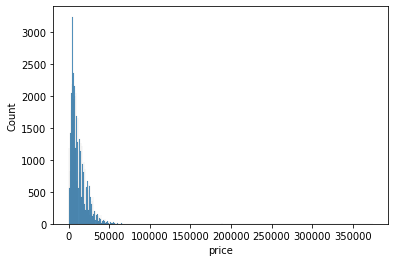

In [71]:
###  Harga

sns.histplot(df['price'])
plt.show()

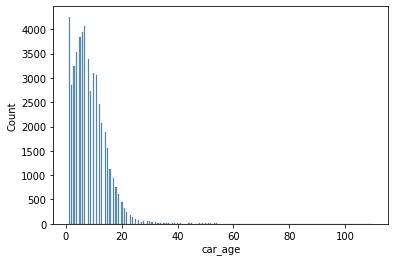

In [72]:
# USIA KENDARAAN

sns.histplot(df['car_age'])
plt.show()

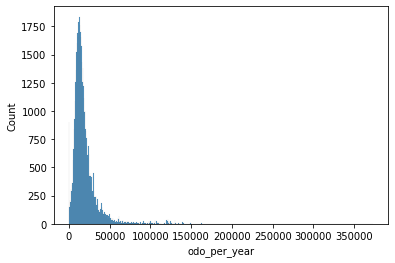

In [73]:
# JARAK TEMPUH

sns.histplot(df['odo_per_year'])
plt.show()

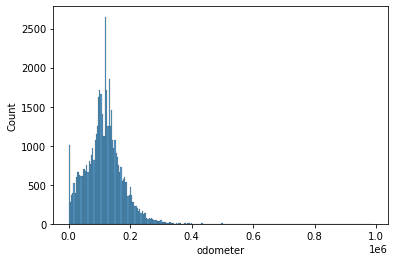

In [74]:
sns.histplot(df['odometer'])
plt.show()

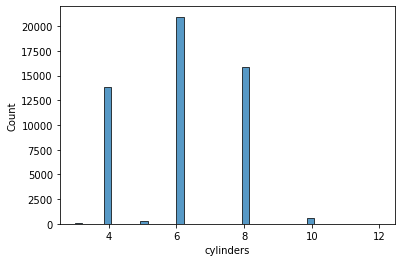

In [75]:
##  Jumlah Silinder

sns.histplot(df['cylinders'])
plt.show()

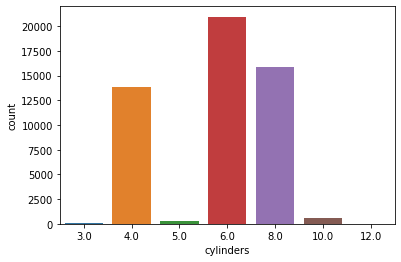

In [76]:
###  Jumlah Silinder
sns.countplot(data=df, x='cylinders')
plt.show()


In [77]:
###  Condition

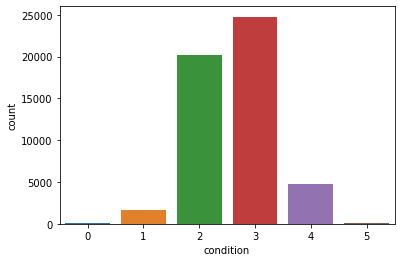

In [78]:

sns.countplot(data=df, x='condition')
plt.show()


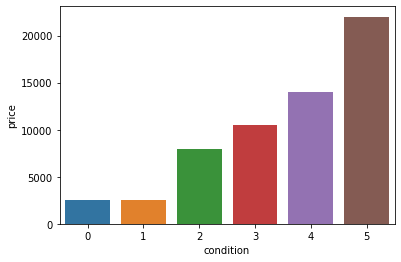

In [79]:
#
price_condition = df.groupby('condition')['price'].median().reset_index()
sns.barplot(data=price_condition, x='condition', y='price')
plt.show()


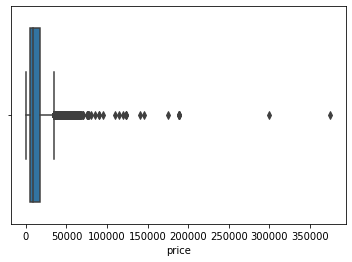

In [80]:
sns.boxplot(data=df, x='price')
plt.show()

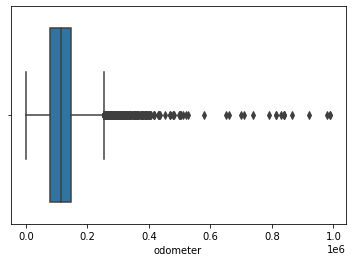

In [81]:
sns.boxplot(data=df, x='odometer')
plt.show()

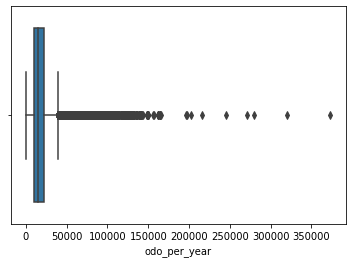

In [82]:
sns.boxplot(data=df, x='odo_per_year')
plt.show()


  - Insights:
    From the Boxplot Graph, There Are Outliers.
  
    It will be measured again after the values ​​have been smoothed by calculating the upper and lower thresholds
</div>

## Studying and Handling Outliers
[Based on the results above, it need to determine what columns may contain outliers and create a DataFrame without them. Hint: Outliers can be identified by determining lower/upper limits for the normal range of values.]


In [83]:
# Tentukan batas bawah outlier 
df_outlier = df.copy()

In [84]:
# 1.Create a procedure to get the upper and lower threshold
q1 = df_outlier['price'].quantile(0.25)
q3 = df_outlier['price'].quantile(0.75)
iqr = q3 - q1
upper_th = 1.5*iqr + q3
lower_th = q1 - 1.5*iqr

In [85]:
q1

5000.0

In [86]:
q3

16839.0

In [87]:
iqr

11839.0

In [ ]:
# Determine the upper limit for outlier prices

upper_th

34597.5

In [89]:
# Determine the lower limit for outlier prices

lower_th

-12758.5

In [90]:
##Create a function to clean outlier data
def outlier_threshold(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    upper_th = 1.5*iqr + q3
    lower_th = q1 - 1.5*iqr
    return upper_th, lower_th

def outlier_cleansing(dataframe, columns):
    for column in columns:
        upper, lower = outlier_threshold(dataframe[column])
        dataframe.loc[dataframe[column] > upper, column] = upper
        dataframe.loc[dataframe[column] < lower, column] = lower
    return dataframe

In [91]:
upper, lower = outlier_threshold(df_outlier['price'])
print(lower, upper)

-12758.5 34597.5


In [92]:
upper, lower = outlier_threshold(df_outlier['odometer'])
print(lower, upper)

-29765.5 254942.5


In [93]:
upper, lower = outlier_threshold(df_outlier['odo_per_year'])
print(lower, upper)

-6551.964285714283 38864.5119047619


In [94]:
df_outlier = outlier_cleansing(dataframe=df_outlier, columns=['price', 'odometer', 'odo_per_year'])

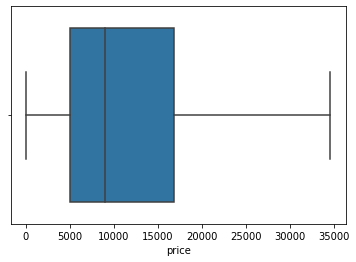

In [95]:
sns.boxplot(data=df_outlier, x='price')
plt.show()

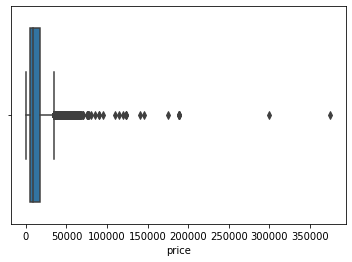

In [96]:
# Compare it with the previous df price boxplot
sns.boxplot(data=df, x='price')
plt.show()

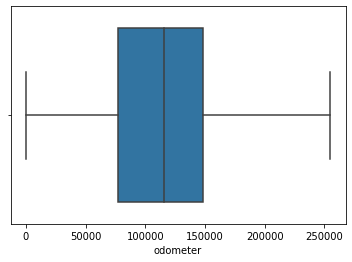

In [97]:
sns.boxplot(data=df_outlier, x='odometer')
plt.show()

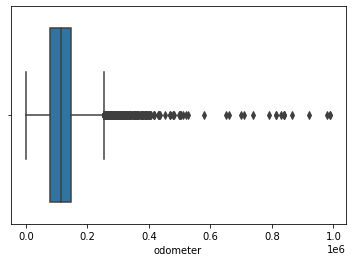

In [98]:
# Compare with the previous df odometer boxplot
sns.boxplot(data=df, x='odometer')
plt.show()

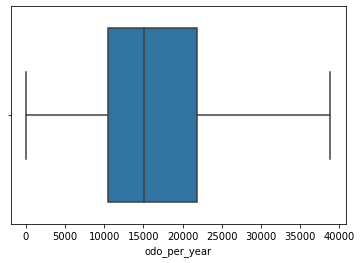

In [99]:
sns.boxplot(data=df_outlier, x='odo_per_year')
plt.show()

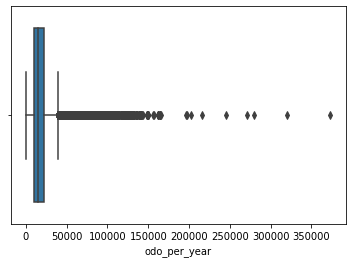

In [100]:
sns.boxplot(data=df, x='odo_per_year')
plt.show()

In [101]:
# Store data without outliers in a separate DataFrame

df_outlier.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400.0,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,2018,6,7,20714.285714
1,25500.0,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,2018,10,7,12672.142857
2,5500.0,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2019,2,6,18333.333333
3,1500.0,2003,ford f-150,1,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,2019,3,16,7620.500000
4,14900.0,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,2019,4,2,38864.511905


<div class="alert alert-block alert-info">
<b>Insight.</b> <a class="tocSkip"></a>
    
    Outlier data is a copy of previous df data
    From the Outlier Data, you can see a graph that has excluded outliers using upper and lower thresholds.
    
    
</div>

## Studying Core Parameters Without Outliers

[Use the filtered data to create a new graph. Compare it to the previous data (which contains outliers). Draw conclusions from each.]

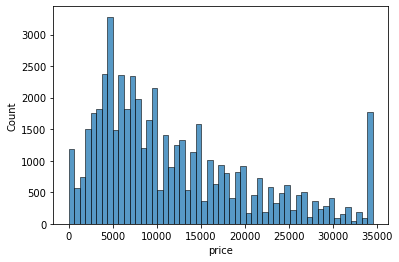

In [102]:
sns.histplot(df_outlier['price'])
plt.show()

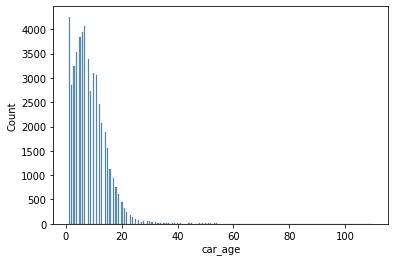

In [103]:
sns.histplot(df_outlier['car_age'])
plt.show()

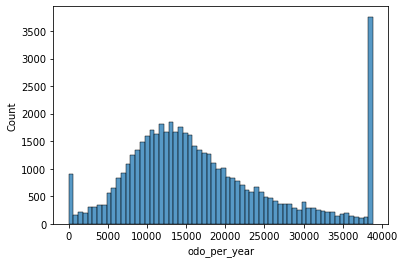

In [104]:
sns.histplot(df_outlier['odo_per_year'])
plt.show()

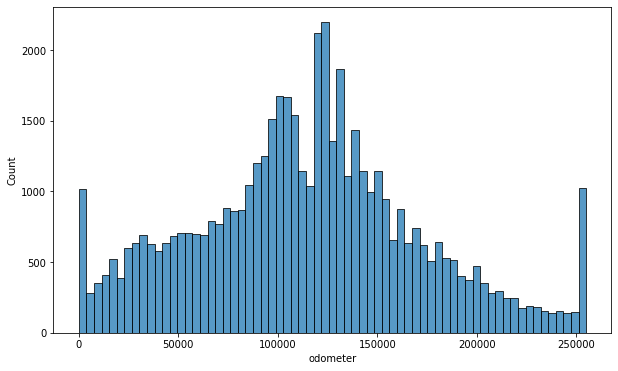

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(df_outlier['odometer'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight.</b> <a class="tocSkip"></a>
    

  Explanation: 
    
    1. The price of most cars offered is in the range of 4000 USD, 
        the price of the most expensive car is 31,000 USD 
    2. Most cars sold are around 10 years old
    3. The maximum mileage of the car being sold is 110,000 km, the maximum is 250,000 km.      
  
   /
</div>

## Advertisement Validity Period
[Learn how many days the ad is running (`days_listed`). Calculate the mean and median. Explain how long an ad generally runs. Determine when ads are removed quickly and when ads are shown for a very long time.]

In [106]:
df_outlier.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51484.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,11846.343445,2009.793557,2.637535,6.112450,114405.048403,0.496303,39.55476,3.005434,2018.307462,6.628491,8.555672,17133.802047
std,8722.182280,6.099381,0.712447,1.573784,56928.083566,0.499991,28.20427,1.997759,0.461447,3.474134,6.057829,9605.422708
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,2018.000000,1.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,77000.000000,0.000000,19.00000,1.000000,2018.000000,3.000000,4.000000,10479.214286
50%,9000.000000,2011.000000,3.000000,6.000000,115376.000000,0.000000,33.00000,3.000000,2018.000000,7.000000,8.000000,15014.833333
75%,16839.000000,2014.000000,3.000000,8.000000,148177.000000,1.000000,53.00000,5.000000,2019.000000,10.000000,12.000000,21833.333333
max,34597.500000,2019.000000,5.000000,12.000000,254942.500000,1.000000,271.00000,6.000000,2019.000000,12.000000,110.000000,38864.511905


In [140]:
df.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,2018,6,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,2018,10,7,12672.142857


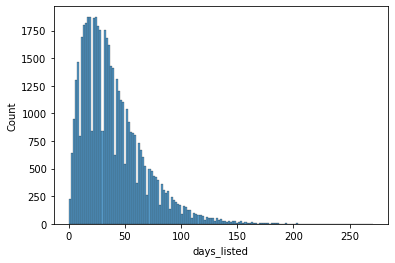

In [107]:
sns.histplot(df_outlier['days_listed'])
plt.show()

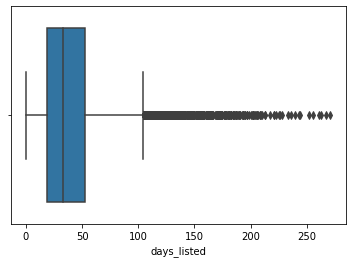

In [108]:
sns.boxplot(data=df_outlier, x='days_listed')
plt.show()

In [109]:
upper, lower = outlier_threshold(df_outlier['days_listed'])
print(lower, upper)

-32.0 104.0


In [110]:
df_outlier = outlier_cleansing(dataframe=df_outlier, columns=['days_listed'])

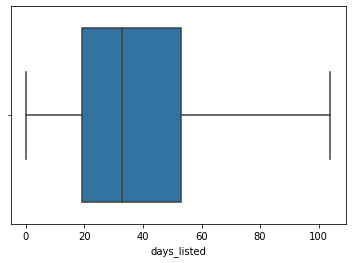

In [111]:
sns.boxplot(data=df_outlier, x='days_listed')
plt.show()

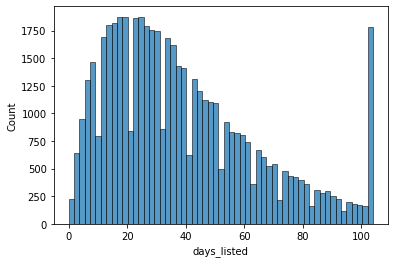

In [112]:
sns.histplot(df_outlier['days_listed'])
plt.show()

<div class="alert alert-block alert-info">
<b> Insight.</b> <a class="tocSkip"></a>
    

  - Insight: 
    
    1. On average, sellers advertise their cars for around 38 days
    2. The fastest ad is 0 days, the oldest ad is 104 days


        
  
   
</div>

## Average Price of Each Type of Vehicle

[Perform an analysis on the number of advertisements and average prices for each type of vehicle. Create a graph showing the dependence of the number of advertisements on the type of vehicle. Select the two vehicle types with the highest number of advertisements.]

In [113]:
df_outlier.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400.0,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19.0,5,2018,6,7,20714.285714
1,25500.0,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50.0,4,2018,10,7,12672.142857
2,5500.0,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79.0,3,2019,2,6,18333.333333
3,1500.0,2003,ford f-150,1,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9.0,4,2019,3,16,7620.500000
4,14900.0,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28.0,1,2019,4,2,38864.511905


In [114]:
df_outlier.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51484.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,11846.343445,2009.793557,2.637535,6.112450,114405.048403,0.496303,38.786181,3.005434,2018.307462,6.628491,8.555672,17133.802047
std,8722.182280,6.099381,0.712447,1.573784,56928.083566,0.499991,25.661283,1.997759,0.461447,3.474134,6.057829,9605.422708
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,77000.000000,0.000000,19.000000,1.000000,2018.000000,3.000000,4.000000,10479.214286
50%,9000.000000,2011.000000,3.000000,6.000000,115376.000000,0.000000,33.000000,3.000000,2018.000000,7.000000,8.000000,15014.833333
75%,16839.000000,2014.000000,3.000000,8.000000,148177.000000,1.000000,53.000000,5.000000,2019.000000,10.000000,12.000000,21833.333333
max,34597.500000,2019.000000,5.000000,12.000000,254942.500000,1.000000,104.000000,6.000000,2019.000000,12.000000,110.000000,38864.511905


In [115]:
#price_condition = df_outlier.groupby('price')['days_listed'].count().reset_index()
#plt.figure(figsize=(10, 6))
#sns.barplot(data=price_condition, x='price', y='days_listed')
#plt.show()

In [116]:
df_outlier.groupby('model')['price'].count()

model
acura tl             236
bmw x5               267
buick enclave        271
cadillac escalade    322
chevrolet camaro     414
                    ... 
toyota sienna        329
toyota tacoma        827
toyota tundra        603
volkswagen jetta     519
volkswagen passat    350
Name: price, Length: 100, dtype: int64

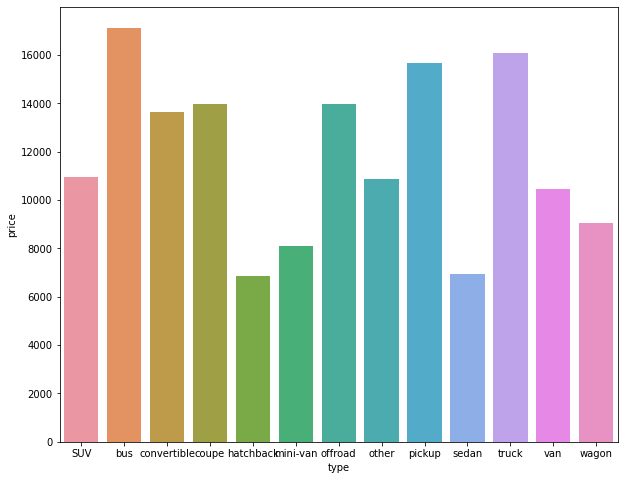

In [117]:
price_condition = df_outlier.groupby('type')['price'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(data=price_condition, x='type', y='price')
plt.show()

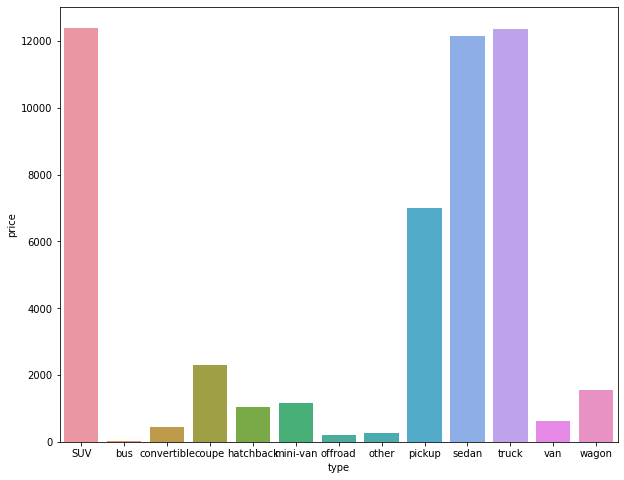

In [118]:
price_condition = df_outlier.groupby('type')['price'].count().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(data=price_condition, x='type', y='price')
plt.show()

In [119]:
#plt.figure(figsize=(10, 15))
#sns.violinplot(data=df_outlier, x='days_listed', y='model')
#plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b> <a class="tocSkip"></a>
    

  Explanation: 
    
    Most of the most expensive types of cars sold are buses and trucks.
    
    The types of cars most commonly offered are SUVs and Sedans


   
</div>

## Price Factor

[What are the factors that most influence the price of a vehicle?] Take each of the popular types of vehicles you found in the previous stage and learn whether the price depends on its age, mileage, condition, transmission type, and color. Create a boxplot graph for the categorical variables (transmission type and color), then create a scatterplot for the remainder. When analyzing categorical variables, remember that a category must have at least 50 ads. Otherwise, the parameters will not be valid for use during analysis.]

#### the advantage of correlation matrices and correlation plots]

In [120]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,2018,6,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,2018,10,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2019,2,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,2019,3,16,7620.500000
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,2019,4,2,40451.500000
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,2018,6,4,14488.500000
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,2018,12,3,26404.000000
7,15990,2013,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0,2019,1,6,18245.500000
8,11500,2012,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,0,2018,7,6,17362.333333
9,9200,2008,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,4,2019,2,11,13381.000000


In [121]:
SUV=df_outlier[(df_outlier['type'] == 'SUV')]

In [122]:
SUV

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400.0,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19.0,5,2018,6,7,20714.285714
7,15990.0,2013,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68.0,0,2019,1,6,18245.500000
8,11500.0,2012,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19.0,0,2018,7,6,17362.333333
9,9200.0,2008,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17.0,4,2019,2,11,13381.000000
14,12990.0,2009,gmc yukon,3,8.0,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24.0,3,2019,1,10,13228.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500.0,2012,chevrolet traverse,2,6.0,gas,144500.0,automatic,SUV,unknown,1.0,2019-03-05,1.0,1,2019,3,7,20642.857143
51496,4999.0,2002,toyota 4runner,3,6.0,gas,177901.0,automatic,SUV,unknown,1.0,2018-05-26,59.0,5,2018,5,16,11118.812500
51500,6995.0,2012,buick enclave,3,6.0,gas,157000.0,automatic,SUV,white,1.0,2018-08-04,17.0,5,2018,8,6,26166.666667
51502,7995.0,2011,chevrolet equinox,4,4.0,gas,111088.0,automatic,SUV,unknown,0.0,2019-04-01,104.0,0,2019,4,8,13886.000000


In [123]:
SUV.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
count,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000,12405.000000
mean,10948.009069,2009.772269,2.689883,5.914389,118151.540750,0.713664,39.011125,2.998065,2018.310923,6.629827,8.577993,17078.049729
std,7945.034237,5.419530,0.687802,1.348590,54338.567118,0.452067,25.795225,2.004830,0.462890,3.481792,5.375079,9048.461345
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000
25%,4999.000000,2007.000000,2.000000,6.000000,84902.000000,0.000000,19.000000,1.000000,2018.000000,3.000000,5.000000,10961.555556
50%,8900.000000,2010.000000,3.000000,6.000000,121540.000000,1.000000,33.000000,3.000000,2018.000000,7.000000,8.000000,15000.000000
75%,14995.000000,2014.000000,3.000000,6.000000,151000.000000,1.000000,54.000000,5.000000,2019.000000,10.000000,12.000000,21176.600000
max,34597.500000,2019.000000,5.000000,10.000000,254942.500000,1.000000,104.000000,6.000000,2019.000000,12.000000,110.000000,38864.511905


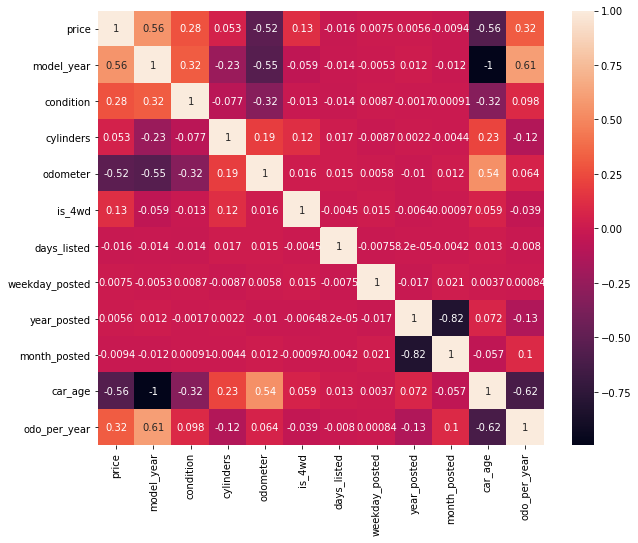

In [124]:
correlation = SUV.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.show()

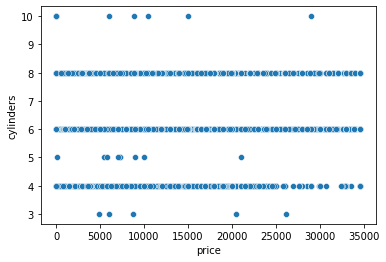

In [125]:
sns.scatterplot(data=SUV, x='price', y='cylinders')
plt.show()

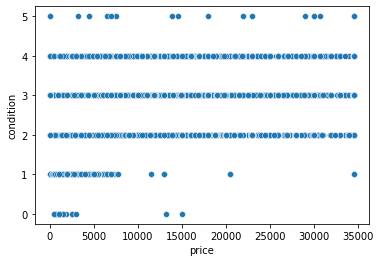

In [126]:
sns.scatterplot(data=SUV, x='price', y='condition')
plt.show()

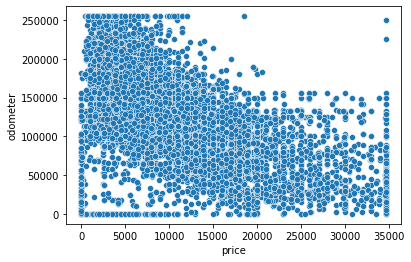

In [127]:
sns.scatterplot(data=SUV, x='price', y='odometer')
plt.show()

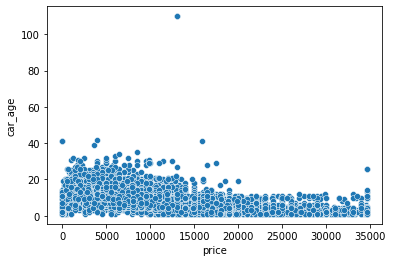

In [128]:
sns.scatterplot(data=SUV, x='price', y='car_age')
plt.show()

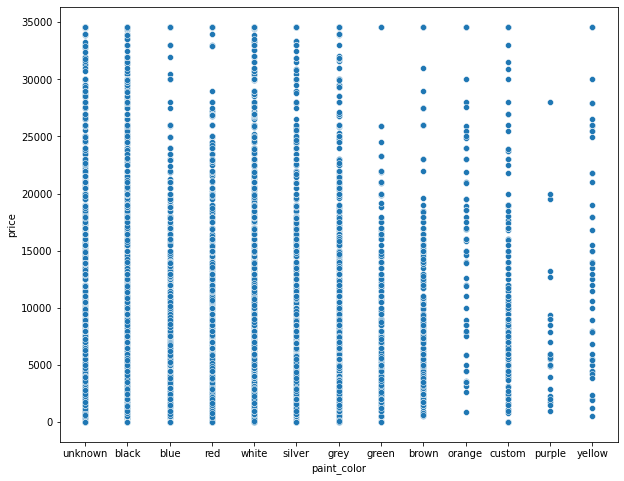

In [129]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=SUV, x='paint_color', y='price')
plt.show()

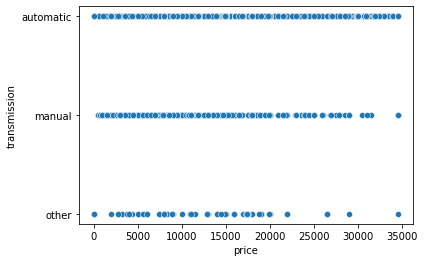

In [130]:
sns.scatterplot(data=SUV, x='price', y='transmission')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight.</b> <a class="tocSkip"></a>
    
For SUV (Sport Utility Vehicle) vehicle types, the correlation is as follows:
    
    1. "Model Year" of the vehicle is positively correlated with "Price" (0.56), the higher the year of manufacture, the higher the price
    2. Vehicle "condition" is positively correlated with "Price" (0.28), the Newer the vehicle, the more the price increases
    3. Vehicle "cylinder" is positively correlated with "Price" but not strongly (0.05), the higher the cylinder the more likely it is to increase the vehicle price.
    4. The high mileage ("Odometer") also influences the price which becomes cheaper. from the graph it has a minus correlation (-0.52).
    5. This also applies to the age of the vehicle ("Car_age). has a correlation of minus -0.56. Prices will decrease if the age of the vehicle increases,
    6. The color (paint_color) that many people are interested in is black
    7. The transmission that many people are interested in is the automatic color

  
</div>

In [131]:
truck=df_outlier[(df_outlier['type'] == 'truck')]

In [132]:
truck

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
22,7500.0,2004,chevrolet silverado,4,8.0,gas,180000.0,automatic,truck,red,1.0,2019-01-05,64.0,5,2019,1,15,12000.000000
39,8000.0,2009,ford f-150,2,8.0,gas,234000.0,automatic,truck,black,1.0,2019-03-31,1.0,6,2019,3,10,23400.000000
50,6200.0,2006,ford f-150,3,6.0,gas,69698.0,automatic,truck,custom,0.0,2018-05-03,50.0,3,2018,5,12,5808.166667
53,10400.0,2012,chevrolet colorado,3,5.0,gas,111871.0,automatic,truck,red,1.0,2019-01-30,27.0,2,2019,1,7,15981.571429
60,13000.0,2005,ram 1500,2,8.0,gas,146000.0,automatic,truck,grey,1.0,2019-03-14,26.0,3,2019,3,14,10428.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51487,1495.0,2011,ford f-150,1,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56.0,1,2018,9,7,2257.714286
51488,21900.0,2013,chevrolet silverado 3500hd,3,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37.0,3,2018,12,5,38864.511905
51497,2995.0,2001,ford f150,2,8.0,gas,206257.0,automatic,truck,red,0.0,2018-12-02,12.0,6,2018,12,17,12132.764706
51498,15900.0,2011,gmc sierra 1500,3,8.0,gas,117000.0,automatic,truck,unknown,1.0,2019-01-25,69.0,4,2019,1,8,14625.000000


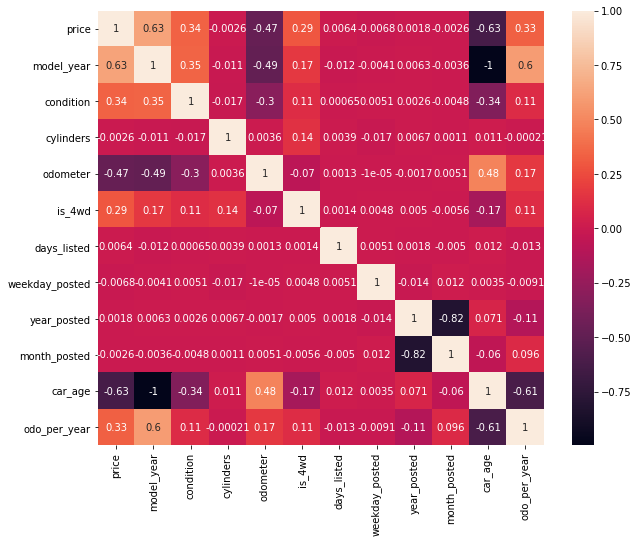

In [133]:
correlation = truck.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.show()

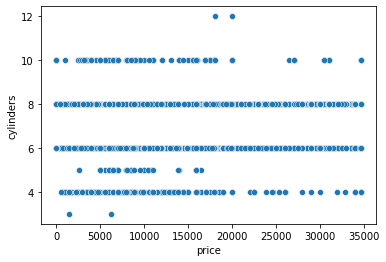

In [134]:
sns.scatterplot(data=truck, x='price', y='cylinders')
plt.show()

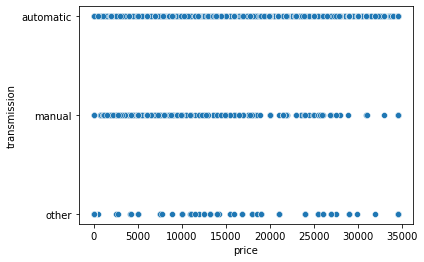

In [135]:
sns.scatterplot(data=truck, x='price', y='transmission')
plt.show()

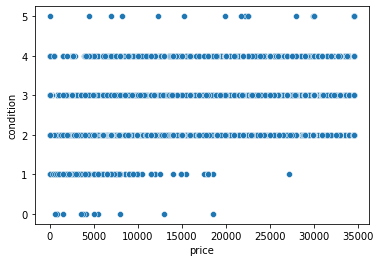

In [136]:
sns.scatterplot(data=truck, x='price', y='condition')
plt.show()

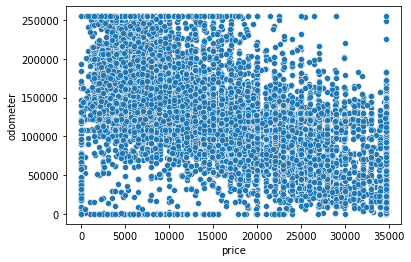

In [137]:
sns.scatterplot(data=truck, x='price', y='odometer')
plt.show()

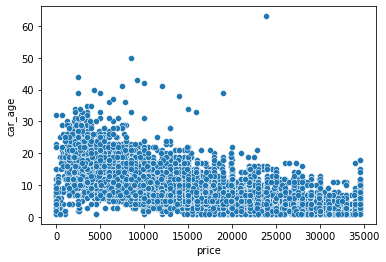

In [138]:
sns.scatterplot(data=truck, x='price', y='car_age')
plt.show()

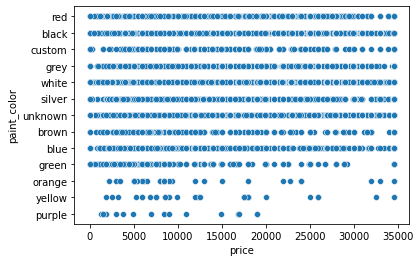

In [139]:
sns.scatterplot(data=truck, x='price', y='paint_color')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight.</b> <a class="tocSkip"></a>
    
  For Truck Vehicle Type, the correlation is as follows:
    
    1. "Model Year" of the vehicle is positively correlated with "Price" (0.63), the higher the year of manufacture, the higher the price
    
    2. Vehicle "condition" is positively correlated with "Price" (0.34), the Newer the vehicle, the more the price increases
    
    3. Vehicle "cylinder" is positively correlated with "Price" but weakly (0.03), the higher the cylinder the more likely it is to increase the vehicle price.
    
    4. The high mileage ("Odometer") also influences the price which becomes cheaper. from the graph it has a minus correlation (-0.47).
    
    5. This also applies to the age of the vehicle ("Car_age). has a correlation of minus -0.63. Prices will decrease if the age of the vehicle increases,
    
    6. The color (paint_color) that many people are interested in is black
    
    7. The transmission that many people are interested in is the automatic color
</div>

<div class="alert alert-block alert-info">
<b> General Conclusion.</b> <a class="tocSkip"></a>
    
    What Affects Vehicle Prices:
    1. Vehicle Type
    2. Vehicle Age
    3. Mileage
    4. Color    
  
</div>